# ME2 MECP Final Exam
Michael Pan, CID 01853189


In [11]:
# CID 01853189
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Task A

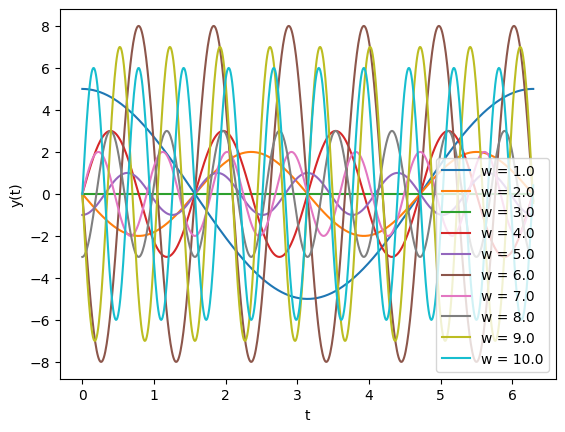

In [12]:
# part a
w = np.linspace(1,10,10)
amp = np.array([5,2,0,3,1,8,2,3,7,6])
phase = np.array([np.pi/2,np.pi,np.pi/2,0,3*np.pi/2,np.pi,0,3*np.pi/2,np.pi,0])

dt = 0.01
t = np.arange(0,2*np.pi + dt, dt)
for i in range(len(w)):
    plt.plot(t,amp[i]*np.sin(w[i]*t + phase[i]),label='w = '+str(w[i]))

plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

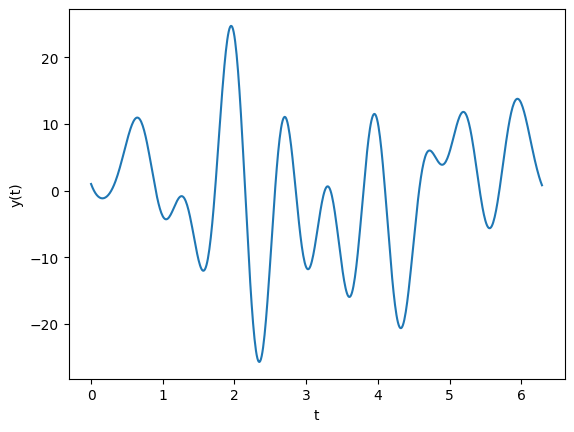

In [13]:
# part b
y = np.zeros(len(t))
for i in range(len(w)):
    y += amp[i]*np.sin(w[i]*t + phase[i])

plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()


0.15873015873015872
100.0


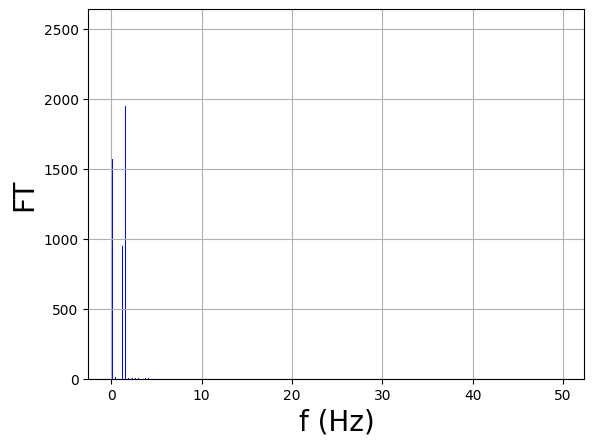

In [21]:
# part c

# functions for discrete fourier transform and its inverse
def DFT(yn):
    '''Discrete Fourier Transform, receives a set of numerical values yn
    and return the Discrete Fourier Transform of the input, FT'''
    '''only consider half the resulting spectrum, f < 1/2dt '''
    N = len(yn)
    FT = np.zeros(N,dtype=complex)
    for k in range(N):
        for n in range(N):
            FT[k] += yn[n]*np.exp(-2j*np.pi*k*n/N)
    return FT

def DFTInv(FT):
    '''Inverse Discrete Fourier Transform, receives a set of numerical values FT
    and return the Inverse Discrete Fourier Transform of the input, yn'''
    N = len(FT)
    yn = np.zeros(N,dtype=complex)
    for n in range(N):
        for k in range(N):
            yn[n] += (1/N)*FT[k]*np.exp(2j*np.pi*k*n/N)
    return yn

Yw = DFT(y)
N = len(Yw)
fmax = 1/dt
df = fmax/N
f = np.arange(0,fmax+df,df)
print(df)
print(fmax)
plt.bar(f[:int(N/2)],abs(Yw[:int(N/2)]),width=0.04,color='b')
plt.grid()
plt.xlabel('f (Hz)',fontsize=20)
plt.ylabel('FT',fontsize=20)
plt.show()


## Task B

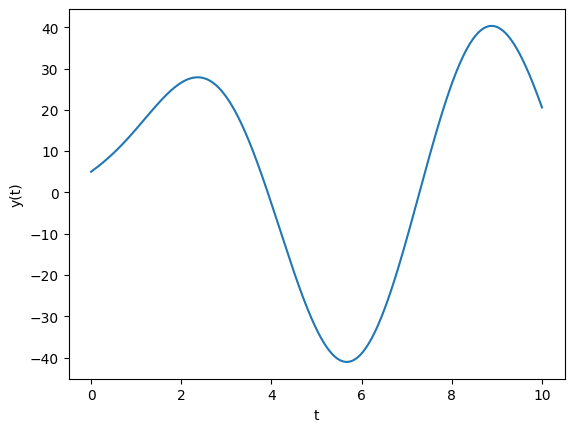

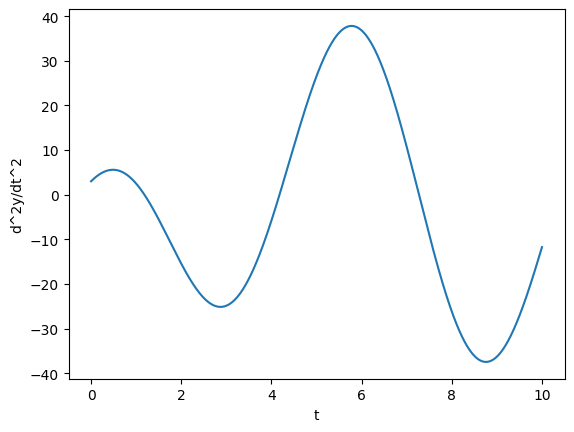

In [33]:
dt = 0.001

# def fwd_euler_n(funcs,t0,y0,t_end,h):
#     t= np.arange(t0, t_end + h, h)
#     y = np.zeros((len(t), len(y0)))
#     y[0] = y0
#     for i in range(1, len(t)):
#         for j, func in enumerate(funcs):
#             y[i, j] = y[i - 1, j] + h * func(t[i - 1], y[i - 1])
#     return t, y
# define a forward euler function to solve a system of ODEs
def FwEulerN(t0,tend,y0,h,func):
    t = np.arange(t0,tend+h,h)
    y = np.zeros((len(t),len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        y[i+1] = y[i] + h*func(t[i],y[i])
    return t,y

y0 = [5,8,3,10]
# def f1(t, y):
#     return y[1]
# def f2(t, y):
#     return y[2]
# def f3(t, y):
#     return y[3]
# def f4(t, y):
#     return -y[0] - 2*y[2] + 3*np.sin(t) - 5*np.cos(t)

# funcs = [f1, f2, f3, f4]
def funcs(t,y):
    yn = np.zeros(len(y))
    yn[0] = y[1]
    yn[1] = y[2]
    yn[2] = y[3]
    yn[3] = -y[0] - 2*y[2] + 3*np.sin(t) - 5*np.cos(t)
    return yn

t, y = FwEulerN(0, 10, y0, dt, funcs)
plt.plot(t,y[:,0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

plt.plot(t,y[:,2])
plt.xlabel('t')
plt.ylabel('d^2y/dt^2')
plt.show()


## Task C

In [40]:
with open('Temperatures.txt','r') as file:
    data = file.readlines()
    data = [line.strip().split() for line in data]
    data = np.array(data,dtype=float)

# Lagrange interpolation
def lagrangian(j,xp,xn):
    '''takes node number j, point to be interpolated xp and known array xn and returns 
        lagrange polynomial Lj'''
    length = len(xn)
    lj = 1
    for i in range(0,length):
        if i != j and xn[j] != xn[i]:
            lj = lj * (xp-xn[i])/(xn[j]-xn[i])
    return lj

def LagrInterp(xn,yn,x):
    '''receives sets of known yn, xn, and interpolates x, returns interpolated y'''
    order = len(xn)
    y = 0
    for j in range(order):
        y += yn[j] * lagrangian(j,x,xn)
    return y

def bisection(f, a, b, e):
    assert b > a
    assert f(a) * f(b) < 0
    while b - a > e:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            # root is in [a, c], f(a) and f(c) have different signs
            b = c
        else:
            a = c
    return (a + b) / 2

dt = 0.5
tmax = (len(data)-1)*dt
t = np.arange(0,tmax+dt,dt)

# starting from interval 3 to 4
def f(x):
    return LagrInterp(t,data,x)
time = bisection(f,3,4,0.005)
print("temperature is 0 at" ,time)



temperature is 0 at 3.365234375


## Task D

In [ ]:
def trapz(x: np.ndarray, y: np.ndarray) -> float:
    """Trapezium integration

    Args:
        x (np.ndarray): x values
        y (np.ndarray): y values

    Returns:
    float: integral value
    """
    return sum(
        (x[i + 1] - x[i]) * (y[i + 1] + y[i]) / 2 for i in range(len(x) - 1)
    )

dx = 0.01
dy = 0.01
R = 10
r = 4
xinner = np.arange(0,R-r,dx)
xouter = np.arange(R-r,R+r,dx)
N = len(xinner)
G = np.zeros(N)
for i in range(0,N):
    # determine the boundaries m and p for this x
    px = np.sqrt((R+r)**2-x[i]**2)
    mx = np.sqrt((R-r)**2-x[i]**2)
    # set the y points for this x, not including the boundaries
    y = np.arange(mx+dy,px,dy)
    z = np.zeros(len(y))
    # determine the values of the function z(x,y)
    for j in range(0,len(y)):
        z[j] = np.sqrt(r**2 - (R- np.sqrt(x[i]**2 + y[j]**2))**2) 
    
    # integrate in dy from cx to dx (for this specific x)
    G[i] = trapz(y,z) # G(x)

# integrate G(x) in dx
I = trapz(x,G)

print(I)